In [1]:
import sys
sys.path.append("/media/HDD_2TB/marc/staged_keras_wrapper")


from matplotlib.patches import Rectangle
import matplotlib as mpl
mpl.use('Agg') # run matplotlib without X server (GUI)
import matplotlib.pyplot as plt
%matplotlib inline


from keras_wrapper.cnn_model import Model_Wrapper
from keras_wrapper.dataset import Dataset

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)
/home/lifelogging/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
dataset_name = 'test_dataset'
image_id = 'input_image'
label_id = 'output_label'
images_size = [256, 256, 3]
images_crop_size = [224, 224, 3]
train_mean = [103.939, 116.779, 123.68]
#base_path = '/absolute/path/to/multimodal_keras_wrapper/data/sample_data'
base_path = '/media/HDD_2TB/marc/staged_keras_wrapper/data/sample_data'

In [25]:
model_name = 'our_model'
type = 'VGG_19_ImageNet'
#save_path = '/absolute/path/to/multimodal_keras_wrapper/Models/'
save_path = '/media/HDD_2TB/marc/staged_keras_wrapper/Models/'

net = Model_Wrapper(nOutput=2, type=type, model_name=model_name, input_shape=images_crop_size)

AttributeError: 'NoneType' object has no attribute 'output'

In [4]:
print net

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 224, 224)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 224, 224)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 112, 112)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [9]:
print net.model.get_layer('block5_conv4').get_weights()[0].shape
w = net.model.get_layer('block5_conv4').get_weights()[0]

(512, 512, 3, 3)


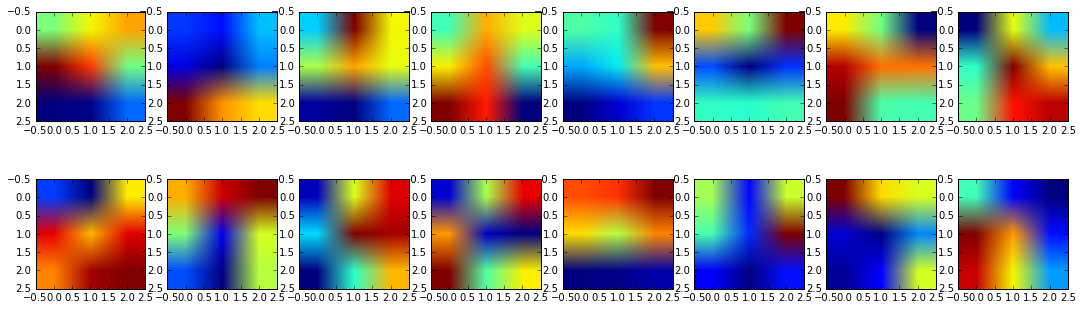

In [16]:
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(w[0,i,:,:])

In [17]:
ds = Dataset(dataset_name, base_path+'/images')

# train split
ds.setInput(base_path + '/train.txt', 'train',
            type='raw-image', id=image_id,
            img_size=images_size, img_size_crop=images_crop_size)
# val split
ds.setInput(base_path + '/val.txt', 'val',
            type='raw-image', id=image_id,
            img_size=images_size, img_size_crop=images_crop_size)
# test split
ds.setInput(base_path + '/test.txt', 'test',
            type='raw-image', id=image_id,
            img_size=images_size, img_size_crop=images_crop_size)
            
ds.setTrainMean(train_mean, image_id)

# train split 
ds.setOutput(base_path+'/train_labels.txt', 'train',
           type='categorical', id=label_id)
# val split
ds.setOutput(base_path+'/val_labels.txt', 'val',
           type='categorical', id=label_id)
# test split        
ds.setOutput(base_path+'/test_labels.txt', 'test',
           type='categorical', id=label_id)


In [18]:
net.setOptimizer(lr=0.01) # compile it

net.setInputsMapping({net.ids_inputs[0]: 0})
net.setOutputsMapping({net.ids_outputs[0]: 0})

overriden_parameters = {'n_epochs': 1, 'batch_size': 10}

net.trainNet(ds, overriden_parameters)

Epoch 1/1
1350/1350 [==============================] - 55s - loss: 8.0256 - val_loss: 8.0590


/media/HDD_2TB/marc/staged_keras_wrapper/keras_wrapper/callbacks_keras_wrapper.py:87: UserWarning: validation score is off; this reducer works only with the validation score on
  'this reducer works only with the validation score on')


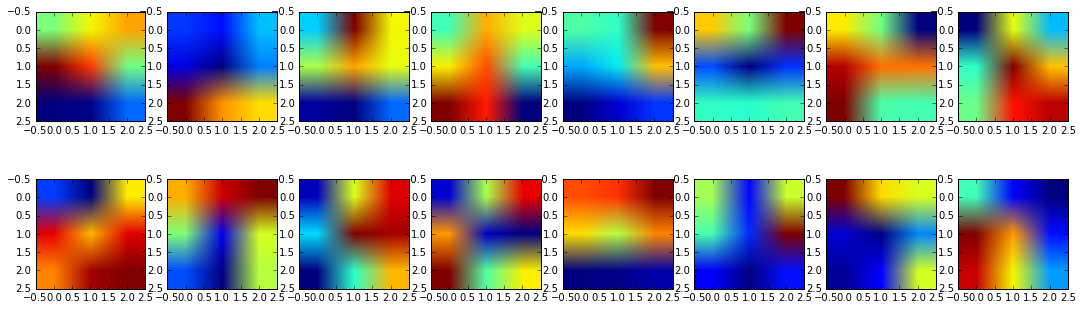

In [19]:
w = net.model.get_layer('block5_conv4').get_weights()[0]
fig = plt.gcf()
fig.set_size_inches(18.5, 5.5)
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(w[0,i,:,:])

In [24]:
w = net.model.get_layer('predictions').get_weights()[0]
print w.shape
for i in range(2):
    print w[:,i][:10]

(4096, 2)
[ 0.00861255 -0.01876928 -0.0285944  -0.02470806 -0.00559212 -0.01130897
 -0.00026677 -0.03064539  0.03485311 -0.0100093 ]
[ 0.01968477  0.00369948 -0.031274   -0.01183683  0.02324308  0.01822293
  0.03290078  0.00305132  0.00634843  0.01175586]


In [27]:
net.model.get_layer(net.ids_inputs[0]).output

input_1

In [29]:
from keras.applications.vgg19 import VGG19
model = VGG19(weights='imagenet', layers_lr=0)

In [34]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 3, 224, 224)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 64, 224, 224)  1792        input_3[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 64, 224, 224)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 64, 112, 112)  0           block1_conv2[0][0]               
___________________________________________________________________________________________